### MNIST_recognition
In this notebook I will work with singular value decomposition and SVM to classify images. There is numbers dataset, where training data consist of pictures of digits, and the target value is the digit itself.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import glob
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

Read both training and test dataset as arrays.

In [34]:
data = np.load('mnist.npz')
X_test_total, X_train_total, y_train_total, y_test_total = data['x_test'], data['x_train'], data['y_train'], data['y_test']

Let's select two digits that I will be learning to separate, for example 3 and 8.

In [36]:
num1, num2 = 3, 8

train_index = [y == num1 or y == num2 for y in y_train_total]
test_index = [y == num1 or y == num2 for y in y_test_total]

X_train, y_train = X_train_total[train_index], y_train_total[train_index]
X_test, y_test = X_test_total[test_index], y_test_total[test_index]

### Looking at the data

In [37]:
print('Initial data shapes: ')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape[0]}')
print(f'\nX_test: {X_test.shape}')
print(f'y_test: {y_test.shape[0]}')
print(f'\nShape of one item: {X_train[0].shape}')

Initial data shapes: 
X_train: (11982, 28, 28)
y_train: 11982

X_test: (1984, 28, 28)
y_test: 1984

Shape of one item: (28, 28)


Target values are numbers: [3 3 3 8 3 3 8 8 3]


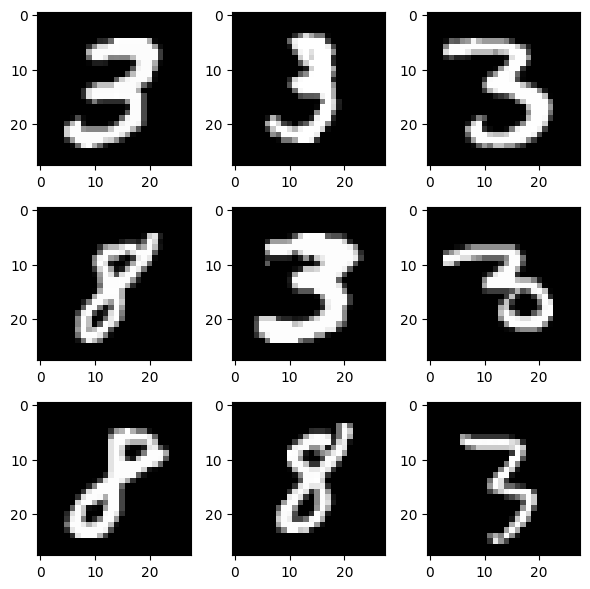

In [38]:
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):
    plt.subplot(b, a, i+1)
    plt.imshow(X_train[i], cmap='gray')
plt.tight_layout()

print(f'Target values are numbers: {y_train[:9]}')

Now data is 3-dimensional of shape (number of images, n_pixels, n_pixels). To work with PCA and SVM I flatten the images by turning each of them into an array of shape (n_pixels x n_pixels, ).

In [39]:
def flatten_image(input_image):
    return input_image.reshape(-1)

In [40]:
X_train_flat = np.array([flatten_image(img) for img in X_train])
X_test_flat = np.array([flatten_image(img) for img in X_test])

print('Flattened data shapes:')
print(f'X_train_flat: {X_train_flat.shape}')
print(f'X_test_flat: {X_test_flat.shape}')

Flattened data shapes:
X_train_flat: (11982, 784)
X_test_flat: (1984, 784)


### Scaler
PCA works best when the data is scaled, so let's scale our data. I will use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for it. 

In [41]:
scaler_one_vs_one = StandardScaler()
X_train_flat = scaler_one_vs_one.fit_transform(X_train_flat)
X_test_flat = scaler_one_vs_one.transform(X_test_flat)

### PCA
Now, call PCA and reduce the number of components for each vector.

In [43]:
pca_one_vs_one = PCA(n_components=128, random_state=42)
X_train_flat = pca_one_vs_one.fit_transform(X_train_flat)
X_test_flat = pca_one_vs_one.transform(X_test_flat)

print('PCA-transformed data shapes:')
print(f'X_train_flat: {X_train_flat.shape}')
print(f'X_test_flat: {X_test_flat.shape}')

PCA-transformed data shapes:
X_train_flat: (11982, 128)
X_test_flat: (1984, 128)


### SVM
Now, use SVM with linear kernel to separate the two classes.

In [44]:
clf_one_vs_one = LinearSVC(random_state=42)
clf_one_vs_one.fit(X_train_flat, y_train)

LinearSVC(random_state=42)

Now, make the predictions and calculate the accuracy, that is, the ratio of the true predictions to the test sample size.  Using [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) as the quality metric here.

In [45]:
y_pred_one_vs_one = clf_one_vs_one.predict(X_test_flat)
acc_svm_one_vs_one = accuracy_score(y_test, y_pred_one_vs_one)
print(f'Test accuracy with SVM one-vs-one: {round(acc_svm_one_vs_one*100)}%')

Test accuracy with SVM one-vs-one: 97%


### Try it from own input
Note that the input picture has to be a white number on a black background, like the numbers in the MNIST dataset.

In [46]:
images_my = sorted(glob.glob('*.jpg'))
y_my = np.array([3, 3, 3, 8, 8, 8])
X_my = []
for image in images_my:
    X_my.append(Image.open(image).convert('L').resize((28,28)))
X_my = np.array(X_my)

Target values are numbers: [3 3 3 8 8 8]


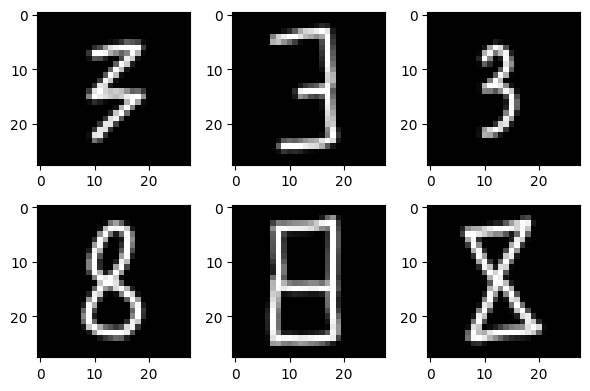

In [47]:
plt.figure(figsize=(6,4))
a, b = 3, 2
for i in range(a*b):
    plt.subplot(b, a, i+1)
    plt.imshow(X_my[i], cmap='gray')
plt.tight_layout()

print(f'Target values are numbers: {y_my}')

Re-shape images and make a prediction.

In [48]:
X_my_flat = np.array([flatten_image(img) for img in X_my])
X_my_flat = scaler_one_vs_one.transform(X_my_flat)
X_my_flat = pca_one_vs_one.transform(X_my_flat)

print('My data shapes: ')
print(f'X_my: {X_my.shape}')
print(f'X_my_flat: {X_my_flat.shape}')
print(f'y_my: {y_my.shape[0]}')
print(f'\nShape of one item: {X_my[0].shape}')
print(f'Shape of one flattened item: {X_my_flat[0].shape[0]}')

My data shapes: 
X_my: (6, 28, 28)
X_my_flat: (6, 128)
y_my: 6

Shape of one item: (28, 28)
Shape of one flattened item: 128


In [49]:
y_my_pred = clf_one_vs_one.predict(X_my_flat)

print('Predict:')
print(f'y_my: {y_my}')
print(f'y_my_pred: {y_my_pred}')

Predict:
y_my: [3 3 3 8 8 8]
y_my_pred: [3 3 8 8 3 3]


Experiment showed significantly lower accuracy (50%) compared to the expected accuracy estimate of 97%. The model was trained on digits from the MNIST dataset, which have a fairly standardized appearance and size. My own handwritten digits could vary significantly in style, size, and distortion, complicating the task for a model trained on MNIST. If my test dataset was relatively small or not diverse, this could have also impacted the accuracy assessment. The quality of the images also plays a crucial role in pattern recognition.

### Singular value decomposition
Now let's try another approach explained [here](https://technodocbox.com/3D_Graphics/77509408-Handwritten-digit-classification-and-reconstruction-of-marred-images-using-singular-value-decomposition.html) in Section 3. For each digit, create a new matrix $A$ whose columns are flattened images of this digit. The first several (say, 10) columns of the matrix $U$ from SVD decomposition of $A$ represent a collection of "typical" images of this digit.

SVD of a matrix $A$ is a decomposition:
$A = U \Sigma V^T,$ where $U$ and $V$ are orthogonal matrices. In this method we will be utilizing some properties of SVD.

In [50]:
def getSingularVectorsLeft(matrix, number=10):
    U, _, _ = np.linalg.svd(matrix)
    return U[:, :number]

In [51]:
def getSingularImage(X_input, y_input, number):
    index = np.where(y_input == number)[0]
    X_input = X_input[index]
    A = np.array([flatten_image(img) for img in X_input])

    return getSingularVectorsLeft(A.transpose())

Try it first on "0".

In [52]:
left_basis_first9 = getSingularImage(X_train_total, y_train_total, 0)

assert left_basis_first9.shape == (784, 10)

### Singular images
Plot first 9 singular images of the digit 0 taking columns of matrix U and reshaping them back into images 28x28.

First 9 singular images of the digit 0


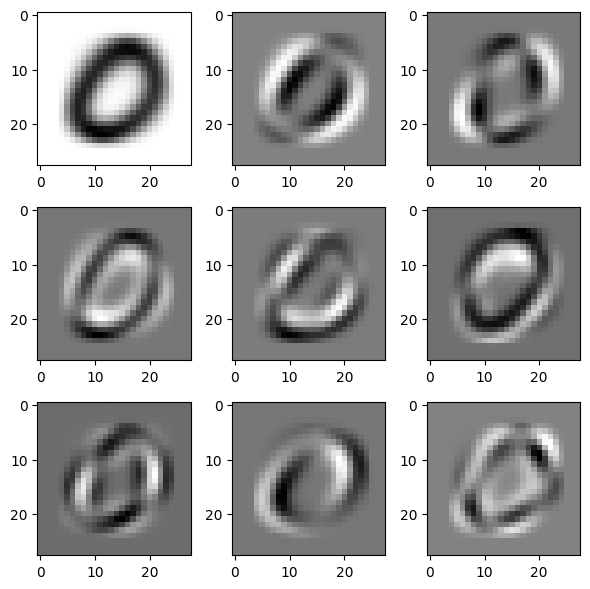

In [53]:
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):
    plt.subplot(b, a, i+1)
    img = left_basis_first9[:, i].reshape((28, 28))
    plt.imshow(img, cmap='gray')
plt.tight_layout()

print('First 9 singular images of the digit 0')

Studying singular images provides insight into which aspects of the data are important for distinguishing them. For instance, the first singular vector might represent the general "average" image of a digit, while subsequent vectors may highlight variations such as the tilt or thickness of lines. These images can show which patterns or features of digits (or other objects) are most important for differentiating classes. The first few columns often contain much of the information about the structure of the data, allowing for a reduction in data dimensionality while still preserving its essential characteristics.

Now let's move on and obtain singular images for all numbers.


In [55]:
number_basis_matrices = np.array([
    getSingularImage(X_train_total, y_train_total, num) for num in range(10)
                                 ])

Plot the first singular image of each digit, similarly to the previous step.

Singular images of the digits 0 to 9


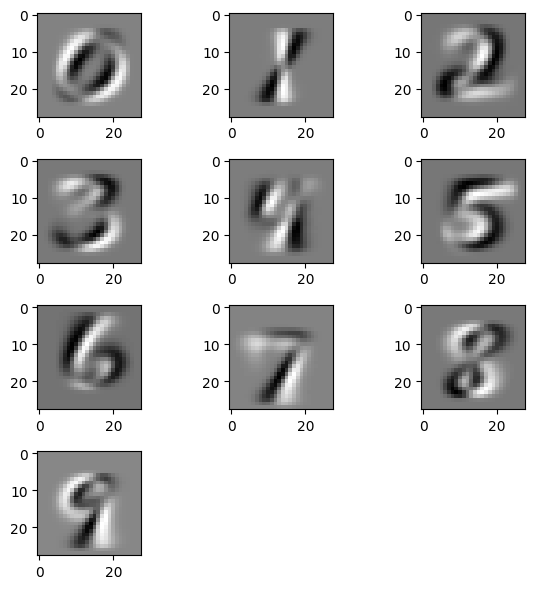

In [56]:
plt.figure(figsize=(6,6))
a, b = 3, 4
for i in range(10):
    plt.subplot(b, a, i+1)
    img = number_basis_matrices[i][:, 1].reshape((28, 28))
    plt.imshow(img, cmap='gray')
plt.tight_layout()

print('Singular images of the digits 0 to 9')

### Task 2.4 (1.5 points)
Now, calculate the new dist matrix for each $U_k$ to apply later in testing:
$dist = (I - U_k \cdot U_{k}^{T})$.

In [57]:
numeric_values = np.array([
    np.identity(number_basis_matrices[i].shape[0]) - 
    np.matmul(number_basis_matrices[i], np.transpose(number_basis_matrices[i])) for i in range(10)
                          ]) 

Implement function utilizing `numeric_values` matrices to predict labels for unknown images.

In [58]:
def find_closest(value_test, numeric_values_input):
    value_test_flat = flatten_image(value_test).transpose()
    value_pred = np.inf
    loss = np.inf
    for index, U_k in enumerate(numeric_values_input):
        dist = np.linalg.norm(np.matmul(U_k, value_test_flat))
        if dist < loss:
            loss = dist
            value_pred = index
    return value_pred

In [59]:
y_pred_svd = np.array([find_closest(img, numeric_values) for img in X_test])
acc_svd = accuracy_score(y_test, y_pred_svd)

print(f'Test accuracy with singular images: {round(acc_svd*100)}%')

Test accuracy with singular images: 93%


### LinearSVC for one-vs-the-rest
In the first part I trained Linear SVM to separate 3s and 8s. Now, implement multiclass classification for _all_ numbers in `MNIST`. LinearSVC for “one-vs-the-rest” multi-class strategy [the documentation](https://scikit-learn.org/stable/modules/svm.html#classification).

In [60]:
# flatten
X_train_total_flat = np.array([flatten_image(img) for img in X_train_total])
X_test_total_flat = np.array([flatten_image(img) for img in X_test_total])
# Standard Scaler
scaler_one_vs_rest = StandardScaler()
X_train_total_flat = scaler_one_vs_rest.fit_transform(X_train_total_flat)
X_test_total_flat = scaler_one_vs_rest.transform(X_test_total_flat)
# PCA
pca_one_vs_rest = PCA(n_components=128, random_state=42)
X_train_total_flat = pca_one_vs_rest.fit_transform(X_train_total_flat)
X_test_total_flat = pca_one_vs_rest.transform(X_test_total_flat)
# LinearSVC
clf_one_vs_rest = LinearSVC(random_state=42)
clf_one_vs_rest.fit(X_train_total_flat, y_train_total)

LinearSVC(random_state=42)

In [61]:
y_pred_total = clf_one_vs_rest.predict(X_test_total_flat)
acc_svm_one_vs_rest = accuracy_score(y_test_total, y_pred_total)

print(f'Test accuracy with SVM one-vs-the-rest: {round(acc_svm_one_vs_rest*100)}%')

Test accuracy with SVM: 91%


In [62]:
print(f'Test accuracy with SVM one-vs-one: {round(acc_svm_one_vs_one*100)}%')
print(f'Test accuracy with SVM one-vs-the-rest: {round(acc_svm_one_vs_rest*100)}%')
print(f'Test accuracy with singular images: {round(acc_svd*100)}%')

Test accuracy with SVM one-vs-one: 97%
Test accuracy with SVM one-vs-the-rest: 91%
Test accuracy with singular images: 93%


***Prediction with singular images is the best model on the test.***